# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# import python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# import distortion filters and utilitary functions
from distortions import add_gaussian, zoom_image, add_gaussian_noise
from utils import get_dataset_from_folders, get_binary_predictions, get_number_cells, compute_jaccard_score, compute_precision_recall
from plots import show_image_mask, show_image_pred, plot_all

### $\bullet$ Setting size of the input image and different paths

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [3]:
def evaluation_summary(result, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print("Accuracy                      : {}".format(result["accuracy"]))
    print("Jaccard score                 : {}".format(result["jaccard"]))
    print("Precision                     : {}".format(result["precision"]))
    print("Recall                        : {}".format(result["recall"]))
    print("Number of cells in predictions: {}".format(result["number_cells_predictions"]))
    print("Number of cells in masks      : {}".format(result["number_cells_masks"]))
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy    = np.mean(predictions == masks)
    jaccard     = compute_jaccard_score(predictions, masks)
    precision, recall = compute_precision_recall(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return {"accuracy": accuracy, "jaccard": jaccard, "precision": precision, 
            "recall": recall, "number_cells_predictions": number_cells_predictions,
            "number_cells_masks": number_cells_masks}

### $\bullet$ Retrieve trained model

In [4]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Get input images with the wanted shape from dataset

In [5]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images.
16110 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

Accuracy                      : 0.9850523705575981
Jaccard score                 : 0.8099403229558501
Precision                     : 0.8493434248390802
Recall                        : 0.9463237435329814
Number of cells in predictions: 18067
Number of cells in masks      : 16110


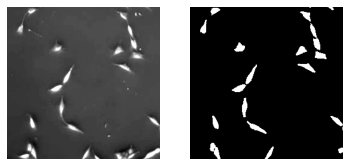

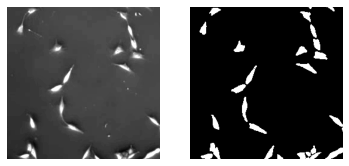

Accuracy                      : 0.9882782879997702
Jaccard score                 : 0.8460135728624366
Precision                     : 0.8896398959723675
Recall                        : 0.9455314919845951
Number of cells in predictions: 17312
Number of cells in masks      : 16110


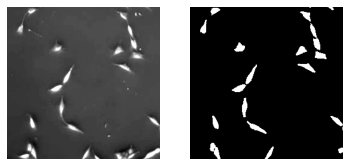

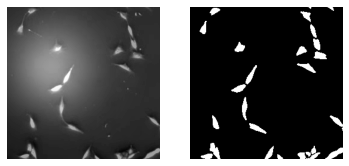

Accuracy                      : 0.9888877120672488
Jaccard score                 : 0.8517488066587346
Precision                     : 0.911181737117101
Recall                        : 0.9291478317202941
Number of cells in predictions: 16889
Number of cells in masks      : 16110


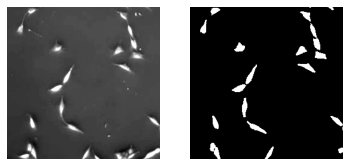

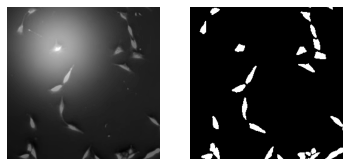

Accuracy                      : 0.9879948634727328
Jaccard score                 : 0.838256693398331
Precision                     : 0.9200364279880354
Recall                        : 0.9043810808511609
Number of cells in predictions: 16642
Number of cells in masks      : 16110


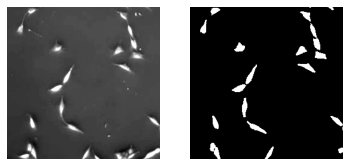

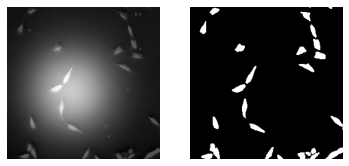

Accuracy                      : 0.9865337297028186
Jaccard score                 : 0.8172672380287931
Precision                     : 0.9241260625656481
Recall                        : 0.876508123523333
Number of cells in predictions: 16470
Number of cells in masks      : 16110


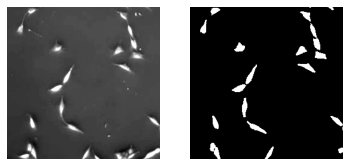

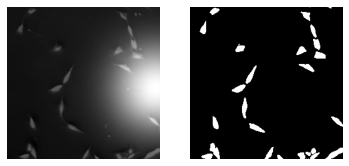

Accuracy                      : 0.9846253338982077
Jaccard score                 : 0.7904328991681723
Precision                     : 0.9252963832891286
Recall                        : 0.8447748590788893
Number of cells in predictions: 16200
Number of cells in masks      : 16110


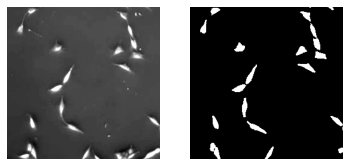

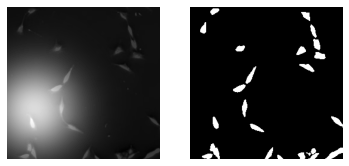

Accuracy                      : 0.9821759691425398
Jaccard score                 : 0.7565472304426586
Precision                     : 0.9245455679923559
Recall                        : 0.80743801417898
Number of cells in predictions: 15923
Number of cells in masks      : 16110


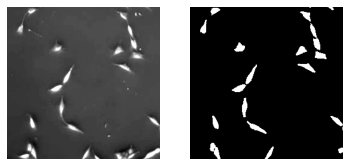

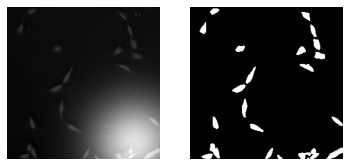

Accuracy                      : 0.9799038756127451
Jaccard score                 : 0.7246482619288577
Precision                     : 0.9249916609945467
Recall                        : 0.7708710143004046
Number of cells in predictions: 15711
Number of cells in masks      : 16110


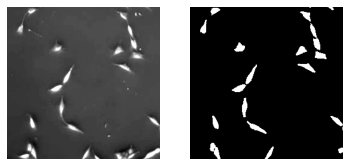

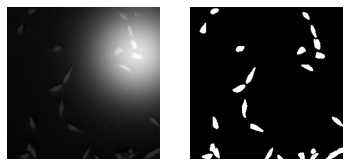

Accuracy                      : 0.9772597668217677
Jaccard score                 : 0.6861644538635929
Precision                     : 0.924383784268971
Recall                        : 0.7280670589256057
Number of cells in predictions: 15345
Number of cells in masks      : 16110


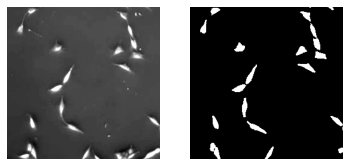

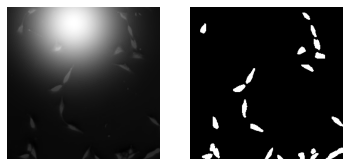

Accuracy                      : 0.974168425915288
Jaccard score                 : 0.6439339836877729
Precision                     : 0.924600439672695
Recall                        : 0.6810838752749699
Number of cells in predictions: 14742
Number of cells in masks      : 16110


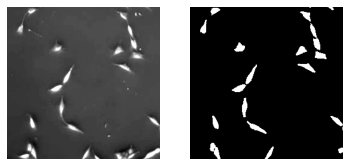

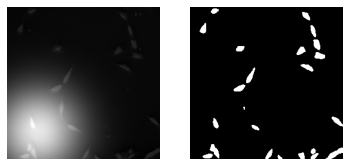

Accuracy                      : 0.9716769648533241
Jaccard score                 : 0.6062020077342333
Precision                     : 0.9244992249930777
Recall                        : 0.6393441129946299
Number of cells in predictions: 14275
Number of cells in masks      : 16110


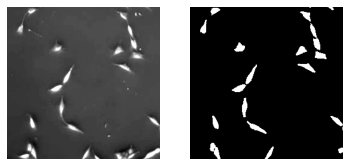

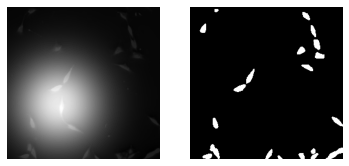

Accuracy                      : 0.9688308117436427
Jaccard score                 : 0.5655175078350196
Precision                     : 0.9238466472410486
Recall                        : 0.5948164203117362
Number of cells in predictions: 13588
Number of cells in masks      : 16110


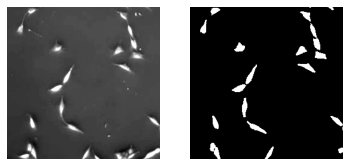

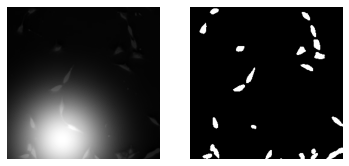

Accuracy                      : 0.965493086272595
Jaccard score                 : 0.5140134243257584
Precision                     : 0.9238095443044455
Recall                        : 0.5384343055705503
Number of cells in predictions: 12754
Number of cells in masks      : 16110


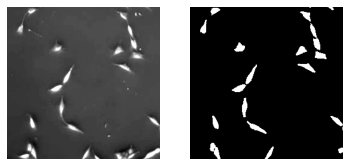

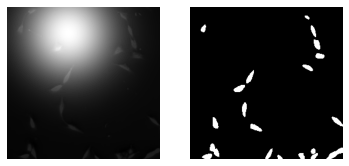

Accuracy                      : 0.9626431334252451
Jaccard score                 : 0.47435817724421286
Precision                     : 0.9246816461565517
Recall                        : 0.4946132540889991
Number of cells in predictions: 11988
Number of cells in masks      : 16110


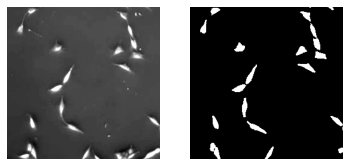

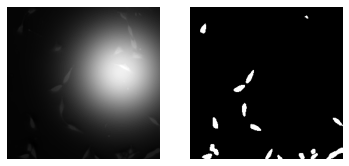

Accuracy                      : 0.9603169759114584
Jaccard score                 : 0.4379612700395493
Precision                     : 0.9230852965994606
Recall                        : 0.45572291717074814
Number of cells in predictions: 11274
Number of cells in masks      : 16110


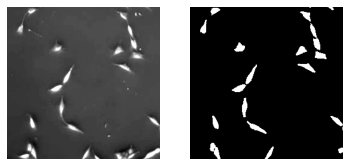

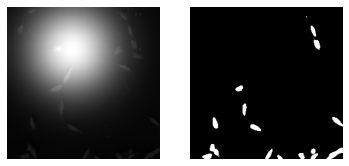

Accuracy                      : 0.9579117120481004
Jaccard score                 : 0.39882470149693977
Precision                     : 0.9257027080711285
Recall                        : 0.41359347305036676
Number of cells in predictions: 10587
Number of cells in masks      : 16110


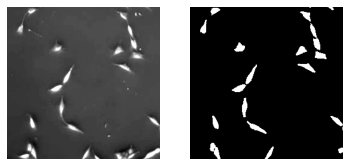

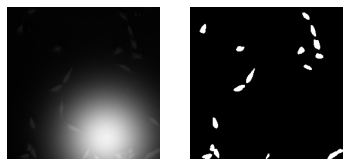

Accuracy                      : 0.955686232622932
Jaccard score                 : 0.36721727897187173
Precision                     : 0.9298571663409106
Recall                        : 0.3795529180238932
Number of cells in predictions: 9829
Number of cells in masks      : 16110


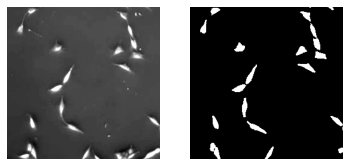

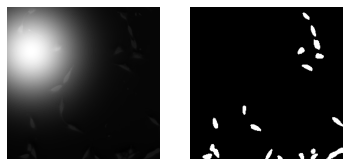

Accuracy                      : 0.9535452450022978
Jaccard score                 : 0.33312317483211923
Precision                     : 0.9258854803574097
Recall                        : 0.34389995005954327
Number of cells in predictions: 9270
Number of cells in masks      : 16110


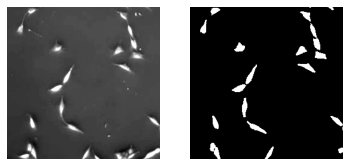

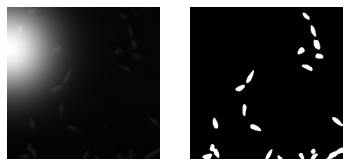

Accuracy                      : 0.9520990109911152
Jaccard score                 : 0.3093258838592682
Precision                     : 0.9211559271380027
Recall                        : 0.3187670394203023
Number of cells in predictions: 8839
Number of cells in masks      : 16110


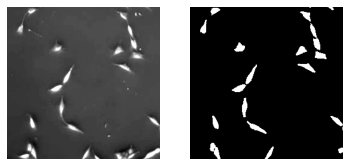

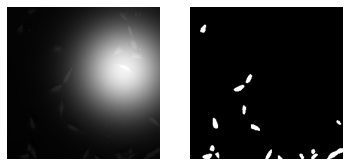

Accuracy                      : 0.9499745986040901
Jaccard score                 : 0.2750445236574408
Precision                     : 0.9252698477765833
Recall                        : 0.28282487860814404
Number of cells in predictions: 8082
Number of cells in masks      : 16110


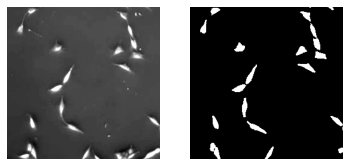

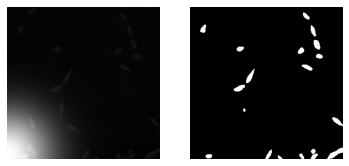

Accuracy                      : 0.9483253927791819
Jaccard score                 : 0.248247842632014
Precision                     : 0.9260630781302019
Recall                        : 0.2539634877426597
Number of cells in predictions: 7511
Number of cells in masks      : 16110


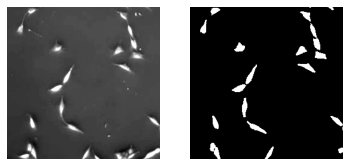

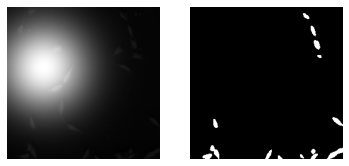

Accuracy                      : 0.9472229602290135
Jaccard score                 : 0.23195162693183427
Precision                     : 0.9283355003623115
Recall                        : 0.23701811164791156
Number of cells in predictions: 7177
Number of cells in masks      : 16110


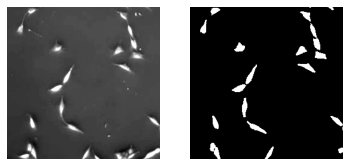

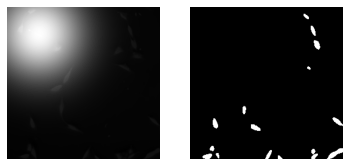

Accuracy                      : 0.9459061865713082
Jaccard score                 : 0.20996609699692861
Precision                     : 0.9353295102542865
Recall                        : 0.2140831281731397
Number of cells in predictions: 6723
Number of cells in masks      : 16110


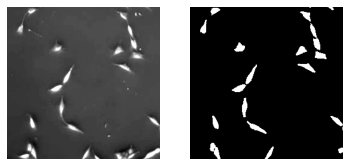

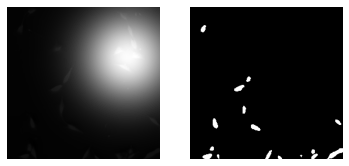

Accuracy                      : 0.9439898920994179
Jaccard score                 : 0.17942116038587158
Precision                     : 0.9216669450515705
Recall                        : 0.18281663216815064
Number of cells in predictions: 6072
Number of cells in masks      : 16110


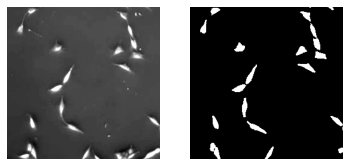

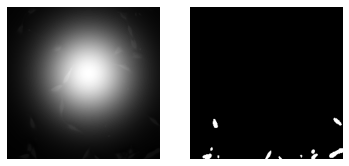

Accuracy                      : 0.9427014818378523
Jaccard score                 : 0.15560938623260298
Precision                     : 0.9264257680386031
Recall                        : 0.1579570339465014
Number of cells in predictions: 5528
Number of cells in masks      : 16110


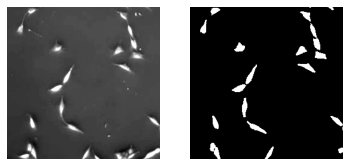

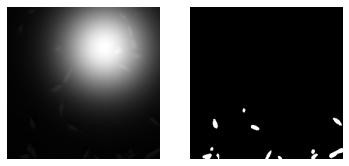

Accuracy                      : 0.9414445764878216
Jaccard score                 : 0.13649824705199282
Precision                     : 0.9301751747473566
Recall                        : 0.13826317533854515
Number of cells in predictions: 5066
Number of cells in masks      : 16110


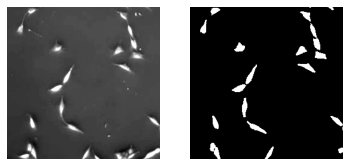

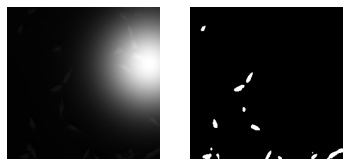

Accuracy                      : 0.9403919893152574
Jaccard score                 : 0.1174933804302918
Precision                     : 0.922330166190372
Recall                        : 0.11871984458785072
Number of cells in predictions: 4709
Number of cells in masks      : 16110


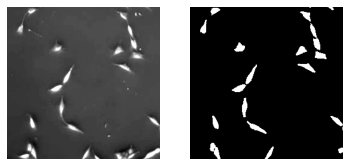

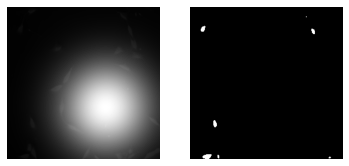

Accuracy                      : 0.9393177107268689
Jaccard score                 : 0.09992818151356958
Precision                     : 0.9218872960800601
Recall                        : 0.10086454389684923
Number of cells in predictions: 4287
Number of cells in masks      : 16110


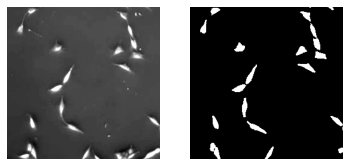

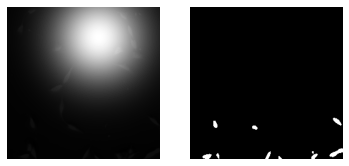

Accuracy                      : 0.9383324118221508
Jaccard score                 : 0.08488779219389152
Precision                     : 0.9097718764051393
Recall                        : 0.0856262063109099
Number of cells in predictions: 3804
Number of cells in masks      : 16110


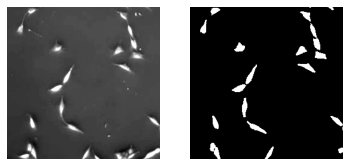

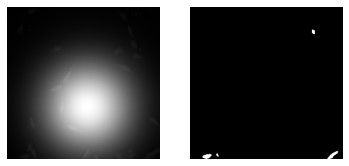

Accuracy                      : 0.9374205944584865
Jaccard score                 : 0.06993126098013949
Precision                     : 0.9053491744236722
Recall                        : 0.07047997283835
Number of cells in predictions: 3404
Number of cells in masks      : 16110


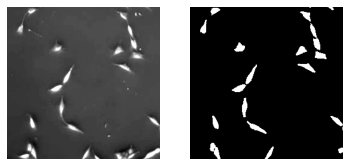

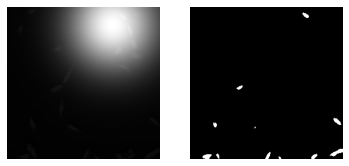

Accuracy                      : 0.9364291022805606
Jaccard score                 : 0.052352566603494737
Precision                     : 0.8698403442943331
Recall                        : 0.0527003388911173
Number of cells in predictions: 2839
Number of cells in masks      : 16110


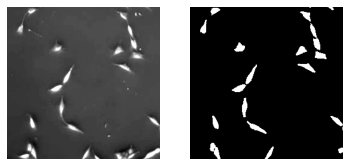

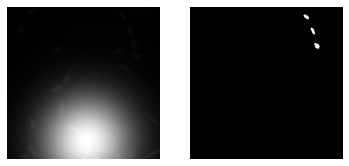

Accuracy                      : 0.935968017578125
Jaccard score                 : 0.046145762719722656
Precision                     : 0.8507669123145684
Recall                        : 0.04642057344191232
Number of cells in predictions: 2626
Number of cells in masks      : 16110


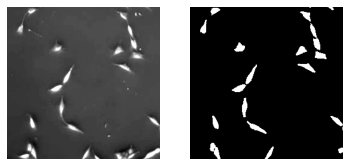

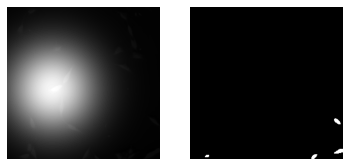

Accuracy                      : 0.9352421180874694
Jaccard score                 : 0.03237362585704465
Precision                     : 0.7997845398122114
Recall                        : 0.032517091755893034
Number of cells in predictions: 2155
Number of cells in masks      : 16110


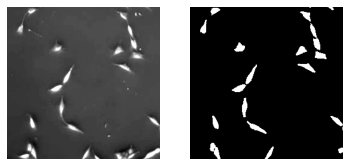

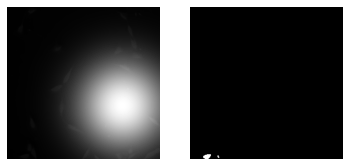

Accuracy                      : 0.9347555721507353
Jaccard score                 : 0.025148786461805534
Precision                     : 0.7585226016851858
Recall                        : 0.02525235625709466
Number of cells in predictions: 1791
Number of cells in masks      : 16110


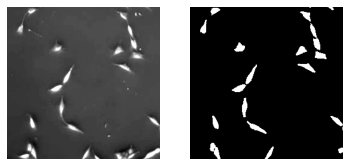

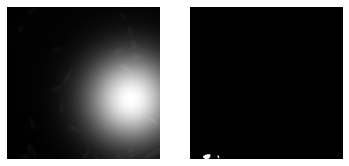

Accuracy                      : 0.9343491198969822
Jaccard score                 : 0.019881731725672428
Precision                     : 0.6421963197024733
Recall                        : 0.019988214835346026
Number of cells in predictions: 1579
Number of cells in masks      : 16110


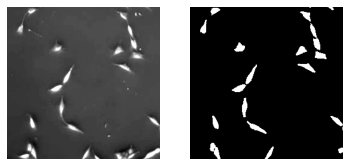

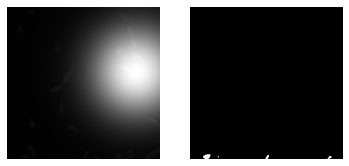

Accuracy                      : 0.9342669917087929
Jaccard score                 : 0.016418946674398433
Precision                     : 0.6457340530722957
Recall                        : 0.016473769589582653
Number of cells in predictions: 1458
Number of cells in masks      : 16110


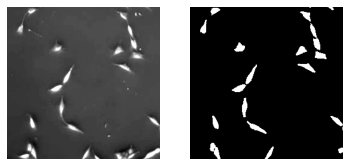

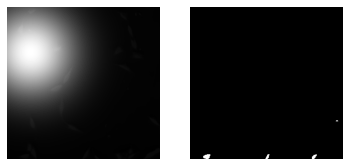

Accuracy                      : 0.9339450611787684
Jaccard score                 : 0.011740823407943114
Precision                     : 0.5540027772577468
Recall                        : 0.011780415445441183
Number of cells in predictions: 1203
Number of cells in masks      : 16110


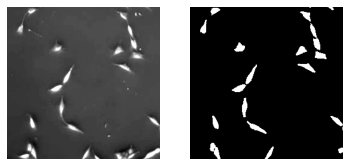

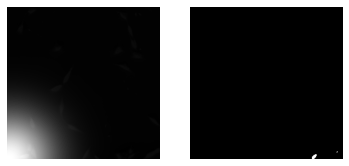

Accuracy                      : 0.933819071451823
Jaccard score                 : 0.009373703813369773
Precision                     : 0.5000983003344351
Recall                        : 0.009405065216943348
Number of cells in predictions: 1112
Number of cells in masks      : 16110


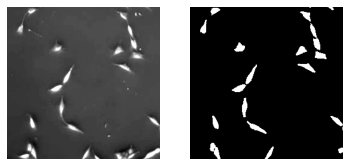

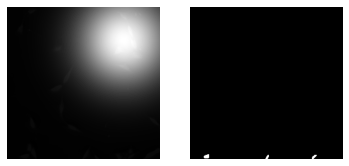

Accuracy                      : 0.9336473352768841
Jaccard score                 : 0.006756825993810554
Precision                     : 0.4130606709282118
Recall                        : 0.006772034136084176
Number of cells in predictions: 969
Number of cells in masks      : 16110


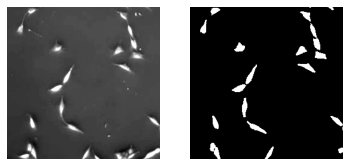

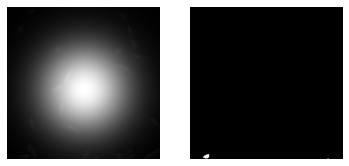

Accuracy                      : 0.9335259231866575
Jaccard score                 : 0.005388038880660351
Precision                     : 0.35460978777361724
Recall                        : 0.005405917472054019
Number of cells in predictions: 894
Number of cells in masks      : 16110


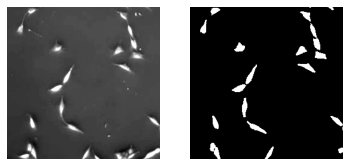

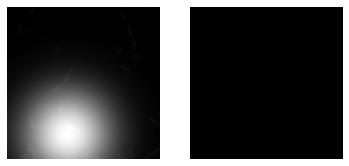

Accuracy                      : 0.933384734509038
Jaccard score                 : 0.004233597360436915
Precision                     : 0.29162515143854
Recall                        : 0.004251131289576315
Number of cells in predictions: 821
Number of cells in masks      : 16110


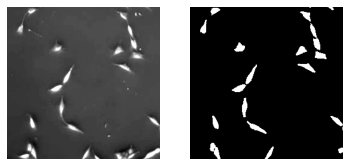

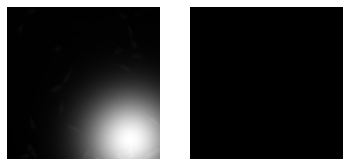

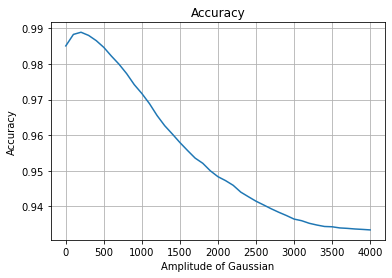

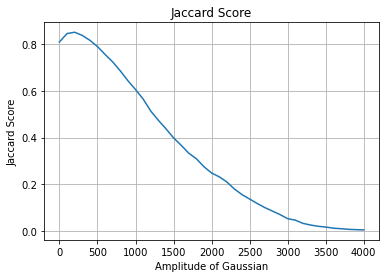

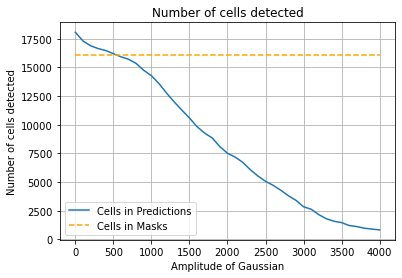

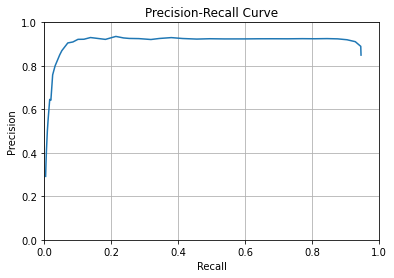

In [6]:
amplitudes = np.linspace(0, 4000, 41)
results = {}

for amplitude in amplitudes:
    added_gaussian_test_images = []
    
    for image in test_images:
        added_gaussian_test_images.append(add_gaussian(image, amplitude))
    
    result = evaluate_model(np.array(added_gaussian_test_images), test_masks, model, number_cells_masks)
    results[amplitude] = result
    
    evaluation_summary(result, test_images[0], test_masks[0], added_gaussian_test_images[0], model)
    
plot_all(results, "Amplitude of Gaussian")

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

Accuracy                      : 0.9850523705575981
Jaccard score                 : 0.8099403229558501
Precision                     : 0.8493434248390802
Recall                        : 0.9463237435329814
Number of cells in predictions: 18067
Number of cells in masks      : 16110


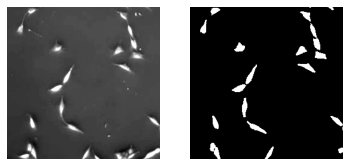

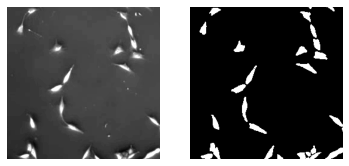

Accuracy                      : 0.985242447198606
Jaccard score                 : 0.8073069014740712
Precision                     : 0.8668729421701693
Recall                        : 0.9221397950374857
Number of cells in predictions: 19250
Number of cells in masks      : 16110


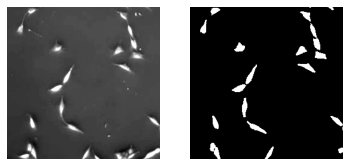

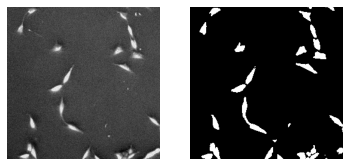

Accuracy                      : 0.9813226737228095
Jaccard score                 : 0.7569897928607531
Precision                     : 0.8435625789990461
Recall                        : 0.8812800458854116
Number of cells in predictions: 29082
Number of cells in masks      : 16110


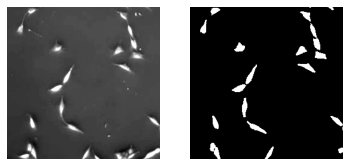

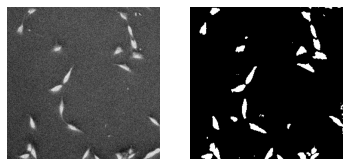

Accuracy                      : 0.9742960013595282
Jaccard score                 : 0.6800523762909373
Precision                     : 0.7862032083251939
Recall                        : 0.8354341507438323
Number of cells in predictions: 42363
Number of cells in masks      : 16110


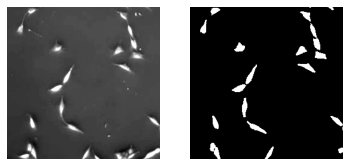

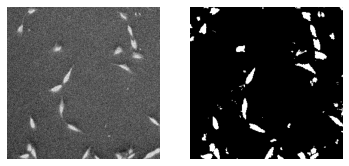

Accuracy                      : 0.9659805297851562
Jaccard score                 : 0.5984614313599217
Precision                     : 0.7179766616623946
Recall                        : 0.7844221845116177
Number of cells in predictions: 56727
Number of cells in masks      : 16110


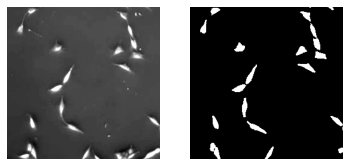

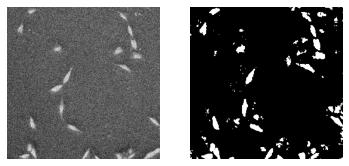

Accuracy                      : 0.9573945288564645
Jaccard score                 : 0.5240738340772846
Precision                     : 0.6519047933835289
Recall                        : 0.7305652321794773
Number of cells in predictions: 72641
Number of cells in masks      : 16110


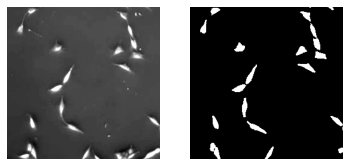

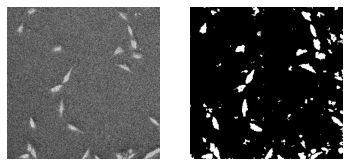

Accuracy                      : 0.9494973276175704
Jaccard score                 : 0.46384577690154505
Precision                     : 0.5994964200174286
Recall                        : 0.6787514767944778
Number of cells in predictions: 87812
Number of cells in masks      : 16110


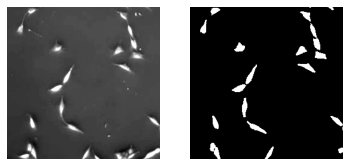

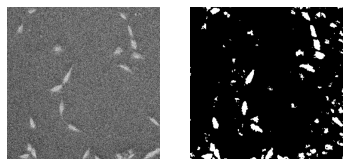

Accuracy                      : 0.9413701973709405
Jaccard score                 : 0.40948076887047863
Precision                     : 0.543751493269128
Recall                        : 0.6326048746714384
Number of cells in predictions: 104711
Number of cells in masks      : 16110


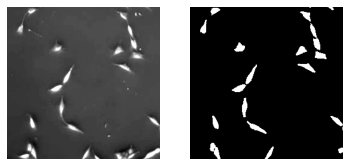

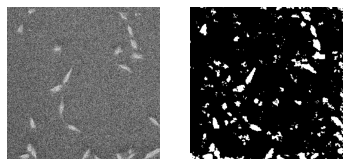

Accuracy                      : 0.9343306298349418
Jaccard score                 : 0.3652698704249311
Precision                     : 0.5001317070541451
Recall                        : 0.5870013080935556
Number of cells in predictions: 119661
Number of cells in masks      : 16110


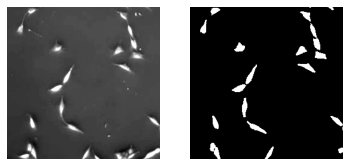

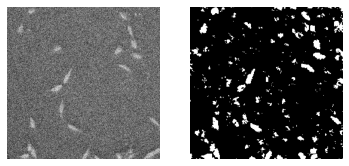

Accuracy                      : 0.9279624190984987
Jaccard score                 : 0.32576848647207995
Precision                     : 0.4606981762763233
Recall                        : 0.5411100340600199
Number of cells in predictions: 132113
Number of cells in masks      : 16110


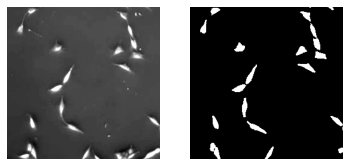

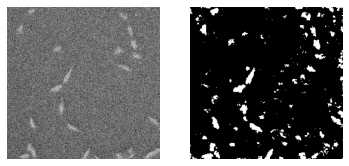

Accuracy                      : 0.922695982689951
Jaccard score                 : 0.29556381448456837
Precision                     : 0.42869390664702867
Recall                        : 0.5037815735274677
Number of cells in predictions: 142001
Number of cells in masks      : 16110


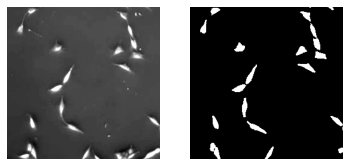

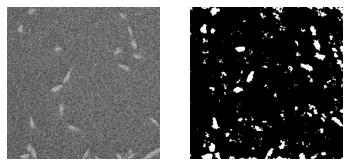

Accuracy                      : 0.9172839594822304
Jaccard score                 : 0.26742881039921207
Precision                     : 0.3971812330380102
Recall                        : 0.46883371116613215
Number of cells in predictions: 152842
Number of cells in masks      : 16110


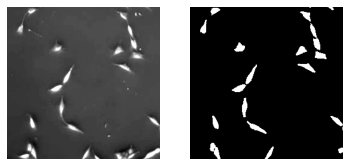

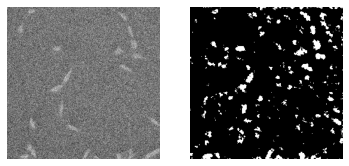

Accuracy                      : 0.9126848707012102
Jaccard score                 : 0.24398842370117046
Precision                     : 0.36928055022642325
Recall                        : 0.4391875348815984
Number of cells in predictions: 162339
Number of cells in masks      : 16110


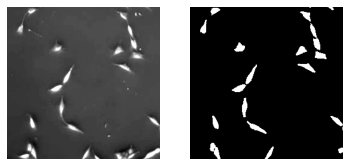

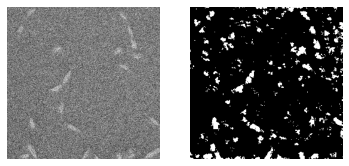

Accuracy                      : 0.908037342744715
Jaccard score                 : 0.22207112547348615
Precision                     : 0.3417271697027588
Recall                        : 0.4085757248956409
Number of cells in predictions: 170426
Number of cells in masks      : 16110


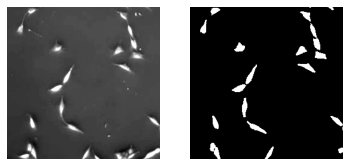

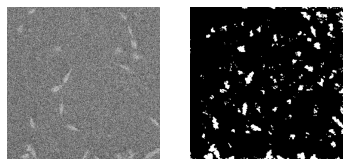

Accuracy                      : 0.9043308632046568
Jaccard score                 : 0.20584290618435092
Precision                     : 0.32069658542962975
Recall                        : 0.38643771163655344
Number of cells in predictions: 178961
Number of cells in masks      : 16110


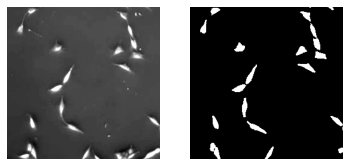

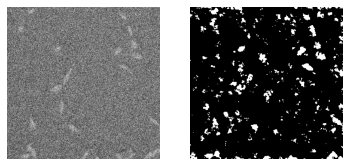

Accuracy                      : 0.901310011919807
Jaccard score                 : 0.19054077702059277
Precision                     : 0.3003066649266428
Recall                        : 0.3617318972748585
Number of cells in predictions: 183483
Number of cells in masks      : 16110


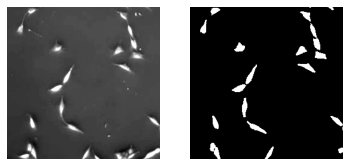

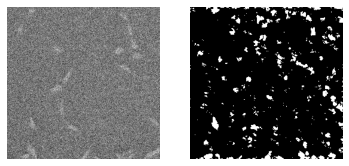

Accuracy                      : 0.8983750885608149
Jaccard score                 : 0.17667841487930983
Precision                     : 0.28202636120677194
Recall                        : 0.34093584373852337
Number of cells in predictions: 188051
Number of cells in masks      : 16110


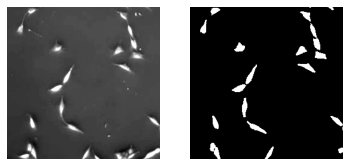

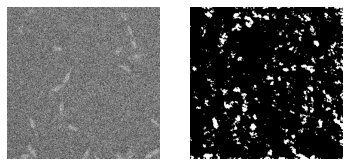

Accuracy                      : 0.8950659658394607
Jaccard score                 : 0.1659183211401338
Precision                     : 0.26493697521370446
Recall                        : 0.3254191002262735
Number of cells in predictions: 195670
Number of cells in masks      : 16110


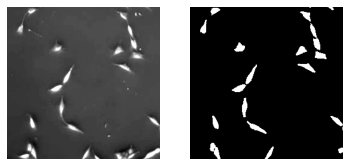

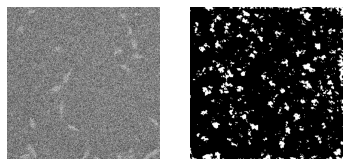

Accuracy                      : 0.8939413930855545
Jaccard score                 : 0.15750652860990033
Precision                     : 0.2551694632144701
Recall                        : 0.3099838002935359
Number of cells in predictions: 197252
Number of cells in masks      : 16110


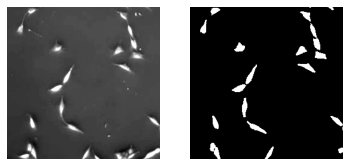

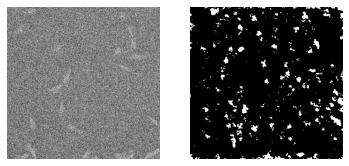

Accuracy                      : 0.8913352218328737
Jaccard score                 : 0.14741932767957847
Precision                     : 0.24101670096470085
Recall                        : 0.2938446508773585
Number of cells in predictions: 201834
Number of cells in masks      : 16110


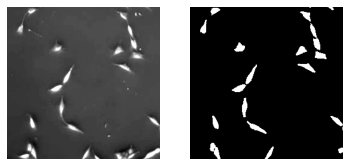

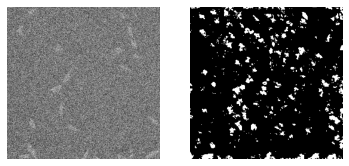

Accuracy                      : 0.8891463036630668
Jaccard score                 : 0.1396101075197894
Precision                     : 0.22859186996749628
Recall                        : 0.28074331902590116
Number of cells in predictions: 206820
Number of cells in masks      : 16110


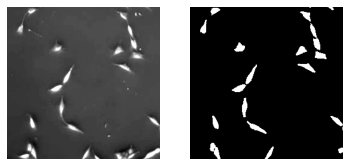

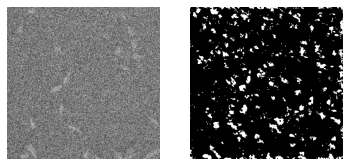

Accuracy                      : 0.8879589604396446
Jaccard score                 : 0.13136638164855335
Precision                     : 0.21869306641759192
Recall                        : 0.26670595561932553
Number of cells in predictions: 207183
Number of cells in masks      : 16110


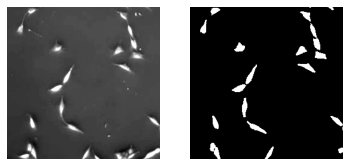

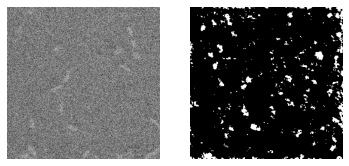

Accuracy                      : 0.8866142721737132
Jaccard score                 : 0.12566813171770214
Precision                     : 0.20962980154778785
Recall                        : 0.2552872375114423
Number of cells in predictions: 210440
Number of cells in masks      : 16110


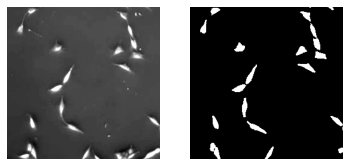

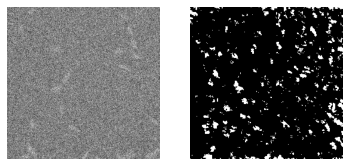

Accuracy                      : 0.885437251072304
Jaccard score                 : 0.119009387069725
Precision                     : 0.20004849874384312
Recall                        : 0.242170094405278
Number of cells in predictions: 211561
Number of cells in masks      : 16110


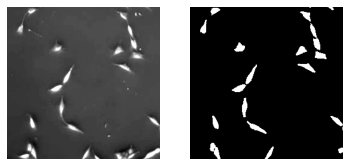

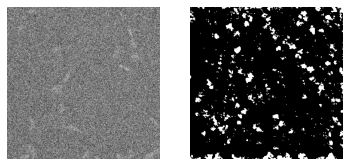

Accuracy                      : 0.8844356462067249
Jaccard score                 : 0.11425236845048091
Precision                     : 0.19310634520778727
Recall                        : 0.23343091678821762
Number of cells in predictions: 213481
Number of cells in masks      : 16110


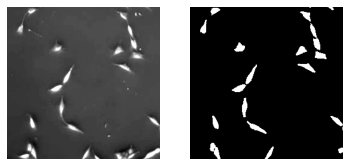

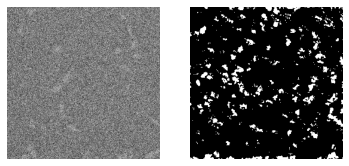

Accuracy                      : 0.8829560822131587
Jaccard score                 : 0.11205217178292991
Precision                     : 0.18896053005872465
Recall                        : 0.23142909215869586
Number of cells in predictions: 215335
Number of cells in masks      : 16110


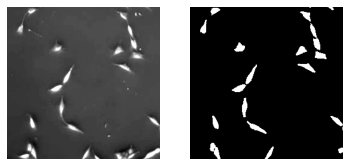

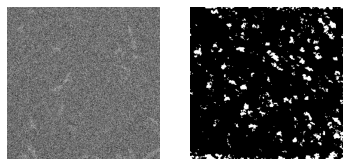

Accuracy                      : 0.8825483434340533
Jaccard score                 : 0.10609122846295314
Precision                     : 0.18169781547487066
Recall                        : 0.21797616483303658
Number of cells in predictions: 215859
Number of cells in masks      : 16110


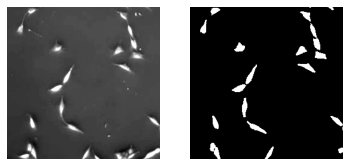

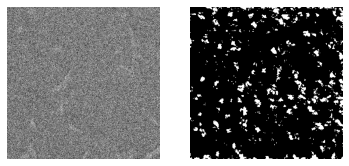

Accuracy                      : 0.881838181439568
Jaccard score                 : 0.10273417511154753
Precision                     : 0.17612894379984304
Recall                        : 0.2114377315034504
Number of cells in predictions: 217059
Number of cells in masks      : 16110


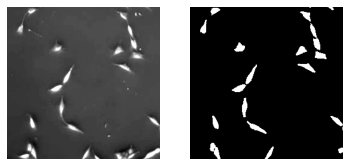

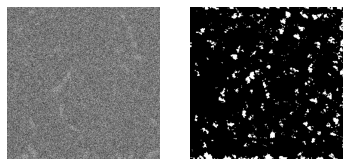

Accuracy                      : 0.8808201808555454
Jaccard score                 : 0.09988569818133702
Precision                     : 0.1719229458367169
Recall                        : 0.20673532964722427
Number of cells in predictions: 218193
Number of cells in masks      : 16110


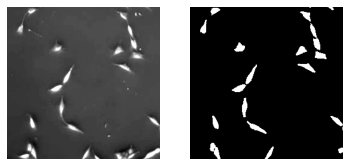

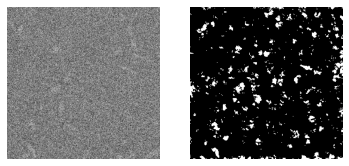

Accuracy                      : 0.8801767985026042
Jaccard score                 : 0.09596579506164933
Precision                     : 0.1657655141671604
Recall                        : 0.1990682429849134
Number of cells in predictions: 218206
Number of cells in masks      : 16110


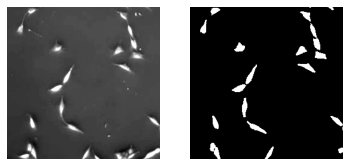

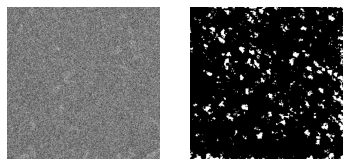

Accuracy                      : 0.8793571023380056
Jaccard score                 : 0.09152367122044916
Precision                     : 0.16046378626742708
Recall                        : 0.19015532825420103
Number of cells in predictions: 218536
Number of cells in masks      : 16110


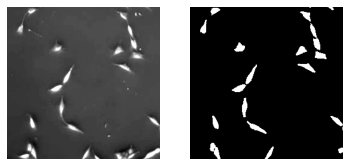

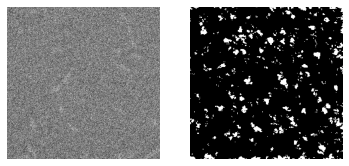

Accuracy                      : 0.8787139892578125
Jaccard score                 : 0.09089785340111171
Precision                     : 0.1579676562167304
Recall                        : 0.19004184667805912
Number of cells in predictions: 220839
Number of cells in masks      : 16110


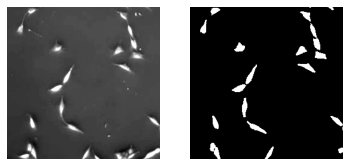

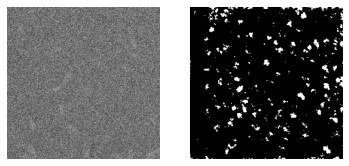

Accuracy                      : 0.8780978034524357
Jaccard score                 : 0.08889943564289733
Precision                     : 0.15439905640016277
Recall                        : 0.18590295116639938
Number of cells in predictions: 222055
Number of cells in masks      : 16110


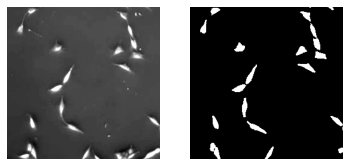

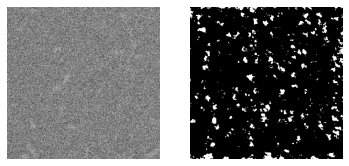

Accuracy                      : 0.8767884198357078
Jaccard score                 : 0.0863655176692353
Precision                     : 0.14956370592002916
Recall                        : 0.18283564777301775
Number of cells in predictions: 224586
Number of cells in masks      : 16110


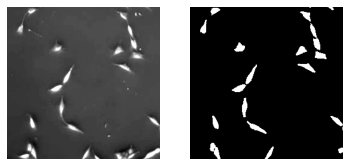

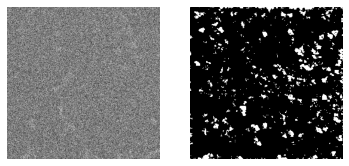

Accuracy                      : 0.877392069498698
Jaccard score                 : 0.08310196536034359
Precision                     : 0.1451507418169738
Recall                        : 0.17404975185304516
Number of cells in predictions: 222760
Number of cells in masks      : 16110


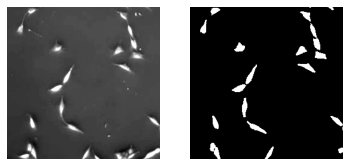

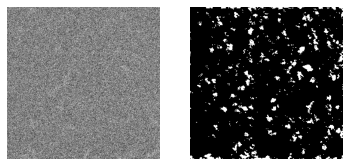

Accuracy                      : 0.8765086753695619
Jaccard score                 : 0.08165949100569832
Precision                     : 0.14293774833668943
Recall                        : 0.17265936533360518
Number of cells in predictions: 223487
Number of cells in masks      : 16110


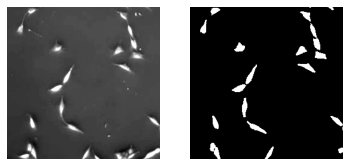

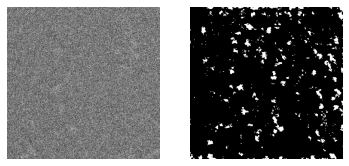

Accuracy                      : 0.8755506328507966
Jaccard score                 : 0.0794659188984757
Precision                     : 0.13885501704753425
Recall                        : 0.16856649105246213
Number of cells in predictions: 225295
Number of cells in masks      : 16110


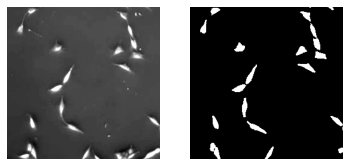

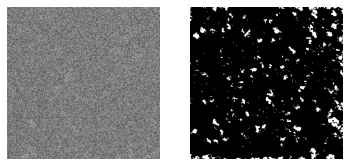

Accuracy                      : 0.8750844319661458
Jaccard score                 : 0.07790512916483738
Precision                     : 0.1361594244156014
Recall                        : 0.16496437120944926
Number of cells in predictions: 225458
Number of cells in masks      : 16110


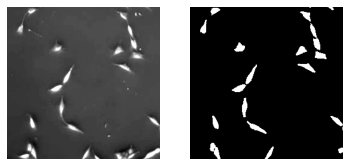

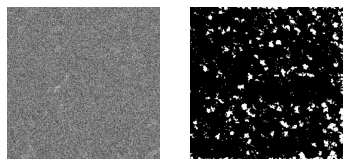

Accuracy                      : 0.8752693325865503
Jaccard score                 : 0.07567464974469329
Precision                     : 0.1332941765234356
Recall                        : 0.15901834549513905
Number of cells in predictions: 225328
Number of cells in masks      : 16110


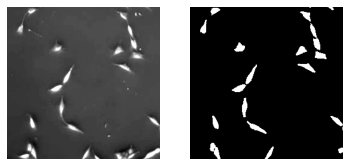

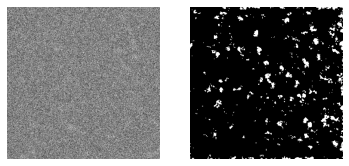

Accuracy                      : 0.8747010773303462
Jaccard score                 : 0.07420059893524612
Precision                     : 0.13050298082527512
Recall                        : 0.15736307559355417
Number of cells in predictions: 224680
Number of cells in masks      : 16110


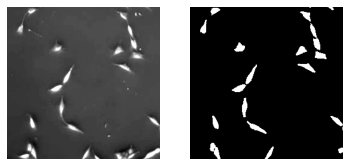

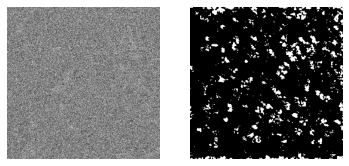

Accuracy                      : 0.8743170046338848
Jaccard score                 : 0.07432170334113906
Precision                     : 0.13107834611028846
Recall                        : 0.1582609687016221
Number of cells in predictions: 226499
Number of cells in masks      : 16110


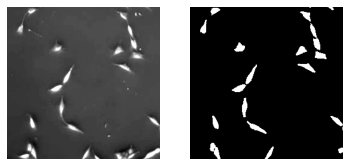

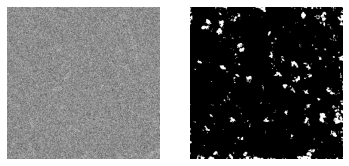

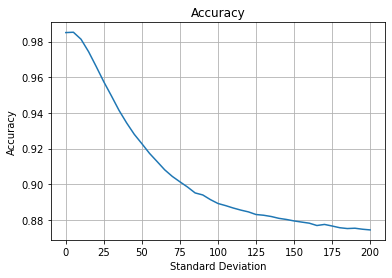

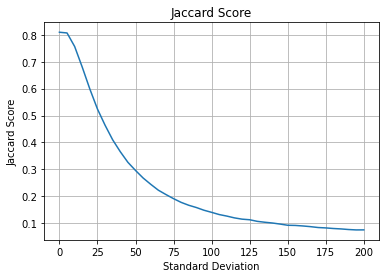

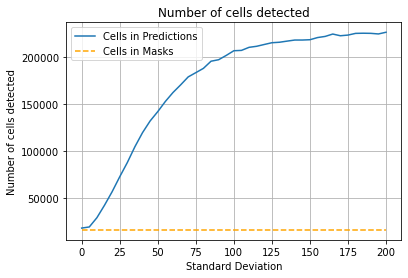

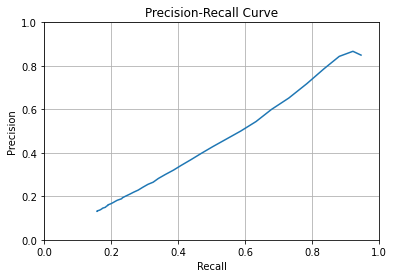

In [7]:
mean = 0
sigmas = np.linspace(0, 200, 41)
results = {}
for sigma in sigmas:
    noisy_test_images = []

    for image in test_images:
        noisy_test_images.append(add_gaussian_noise(image, mean, sigma))

    result = evaluate_model(np.array(noisy_test_images), test_masks, model, number_cells_masks)
    results[sigma] = result
    
    evaluation_summary(result, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_all(results, "Standard Deviation")

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

Accuracy                      : 0.9854381785673254
Jaccard score                 : 0.18832605851067544
Precision                     : 0.35700081236345577
Recall                        : 0.31150394152316274
Number of cells in predictions: 7160
Number of cells in masks      : 13770


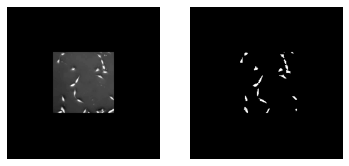

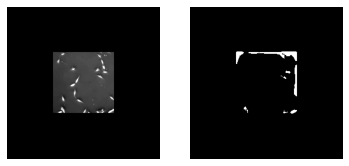

Accuracy                      : 0.9822141759535845
Jaccard score                 : 0.32228708103574677
Precision                     : 0.46670338489956464
Recall                        : 0.5142833313740283
Number of cells in predictions: 10488
Number of cells in masks      : 14570


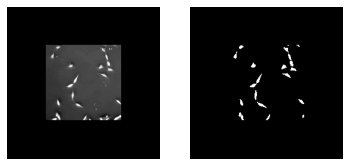

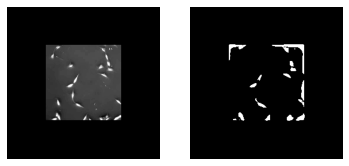

Accuracy                      : 0.9813693177466299
Jaccard score                 : 0.4895072508477911
Precision                     : 0.5761942683536067
Recall                        : 0.764063285190932
Number of cells in predictions: 13023
Number of cells in masks      : 15110


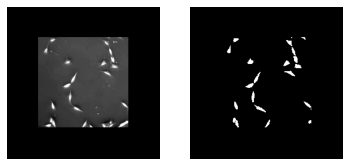

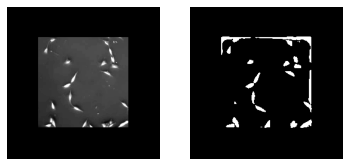

Accuracy                      : 0.9806386910232843
Jaccard score                 : 0.5937399019354184
Precision                     : 0.6383716208697373
Recall                        : 0.8973645860726484
Number of cells in predictions: 14798
Number of cells in masks      : 15400


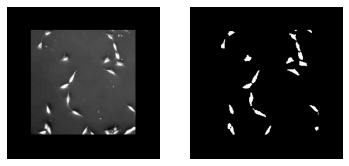

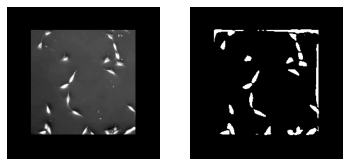

Accuracy                      : 0.9801940618776808
Jaccard score                 : 0.6557615194287276
Precision                     : 0.6890093025409462
Recall                        : 0.9335691515220192
Number of cells in predictions: 15918
Number of cells in masks      : 15623


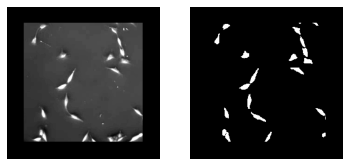

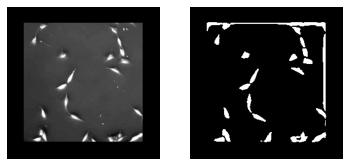

Accuracy                      : 0.9789803000057444
Jaccard score                 : 0.6945783944349232
Precision                     : 0.726715002472873
Recall                        : 0.9412298531066914
Number of cells in predictions: 17026
Number of cells in masks      : 15842


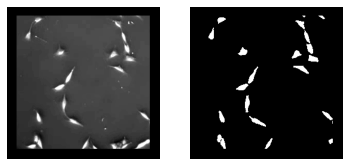

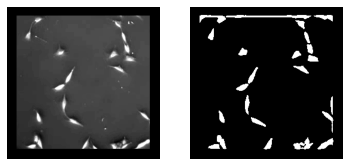

Accuracy                      : 0.9792752733417586
Jaccard score                 : 0.7346380053659918
Precision                     : 0.7758504552045414
Recall                        : 0.9334827321237138
Number of cells in predictions: 17518
Number of cells in masks      : 16087


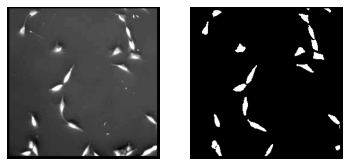

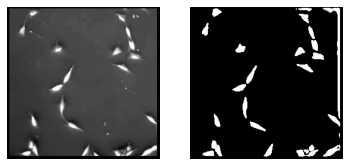

Accuracy                      : 0.9885726928710937
Jaccard score                 : 0.8458775730775338
Precision                     : 0.9155268302496661
Recall                        : 0.9176274883906704
Number of cells in predictions: 15142
Number of cells in masks      : 14490


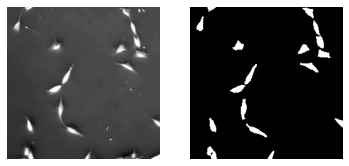

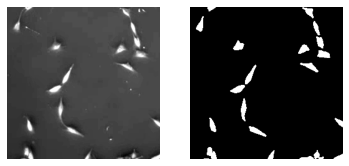

Accuracy                      : 0.9880199357575061
Jaccard score                 : 0.8330466605545421
Precision                     : 0.929100197596448
Recall                        : 0.8896832478295544
Number of cells in predictions: 13185
Number of cells in masks      : 12566


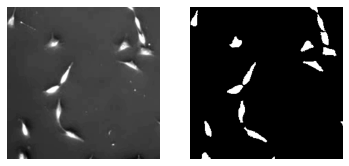

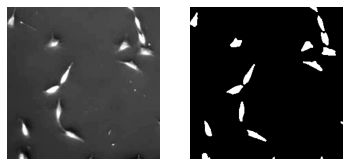

Accuracy                      : 0.9866464652267157
Jaccard score                 : 0.8081226592904462
Precision                     : 0.936993214156398
Recall                        : 0.855022816635131
Number of cells in predictions: 11496
Number of cells in masks      : 10694


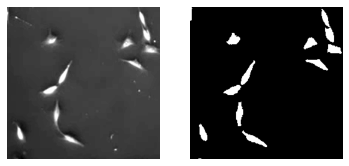

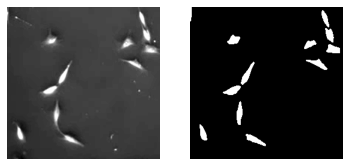

Accuracy                      : 0.984847962622549
Jaccard score                 : 0.777870638495815
Precision                     : 0.939469351101243
Recall                        : 0.8195130463611517
Number of cells in predictions: 10366
Number of cells in masks      : 9395


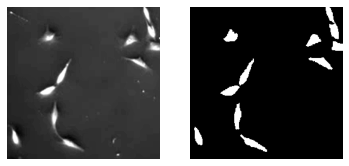

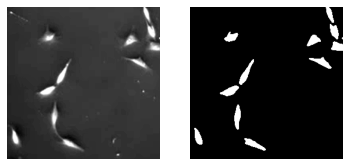

Accuracy                      : 0.9822818531709558
Jaccard score                 : 0.7353865768520225
Precision                     : 0.9400596511309931
Recall                        : 0.7726138354404511
Number of cells in predictions: 9347
Number of cells in masks      : 8378


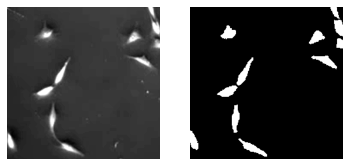

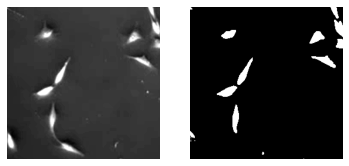

Accuracy                      : 0.9803772571040135
Jaccard score                 : 0.70773393662106
Precision                     : 0.9392266457645599
Recall                        : 0.7428455827300021
Number of cells in predictions: 8508
Number of cells in masks      : 7465


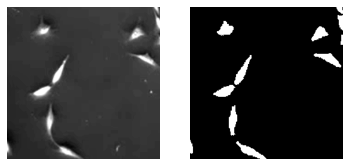

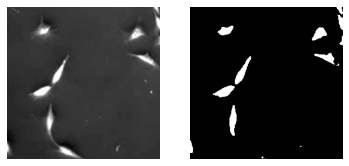

Accuracy                      : 0.9781980626723346
Jaccard score                 : 0.6718904335761829
Precision                     : 0.9330181315537586
Recall                        : 0.7063792084994497
Number of cells in predictions: 7837
Number of cells in masks      : 6760


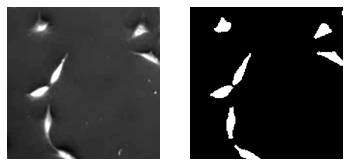

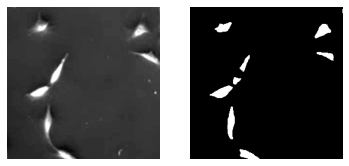

Accuracy                      : 0.9769354128370098
Jaccard score                 : 0.6531445442012789
Precision                     : 0.9308164231013286
Recall                        : 0.6879197536430137
Number of cells in predictions: 7390
Number of cells in masks      : 6190


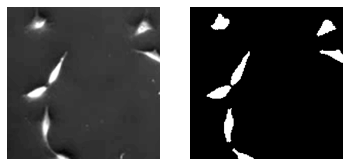

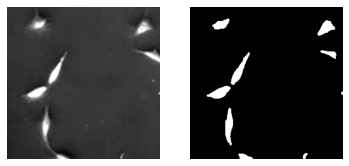

Accuracy                      : 0.975748249128753
Jaccard score                 : 0.6386877407528428
Precision                     : 0.9258897385061438
Recall                        : 0.6741430292358437
Number of cells in predictions: 6922
Number of cells in masks      : 5666


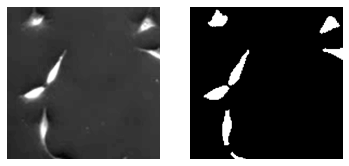

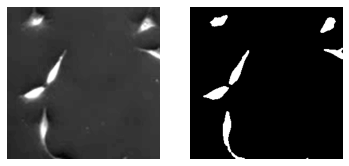

Accuracy                      : 0.9749151491651348
Jaccard score                 : 0.6316599341088185
Precision                     : 0.9232248474154624
Recall                        : 0.6675662430857553
Number of cells in predictions: 6444
Number of cells in masks      : 5204


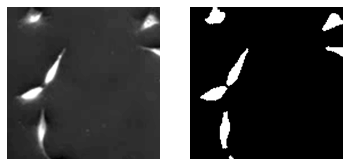

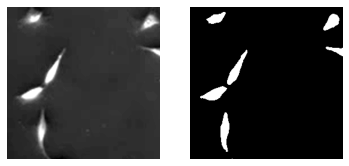

Accuracy                      : 0.9743778901941637
Jaccard score                 : 0.6262794420494299
Precision                     : 0.9223268991408422
Recall                        : 0.6621630794926122
Number of cells in predictions: 6021
Number of cells in masks      : 4710


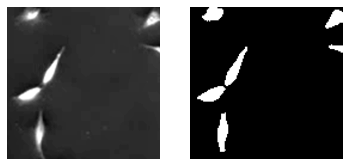

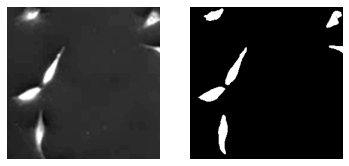

Accuracy                      : 0.9720172358494179
Jaccard score                 : 0.5879102491115148
Precision                     : 0.8856956118494076
Recall                        : 0.6275862632671784
Number of cells in predictions: 4582
Number of cells in masks      : 3820


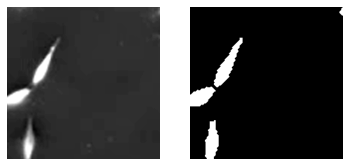

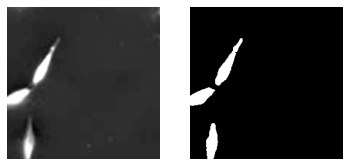

Accuracy                      : 0.9682483149509804
Jaccard score                 : 0.5200564218342428
Precision                     : 0.8290350265790941
Recall                        : 0.5594281394711339
Number of cells in predictions: 3703
Number of cells in masks      : 2753


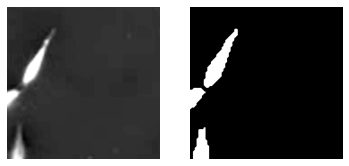

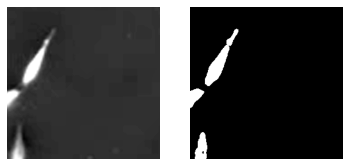

Accuracy                      : 0.9642336078718596
Jaccard score                 : 0.44182460055793404
Precision                     : 0.7683065914265766
Recall                        : 0.46951619542893375
Number of cells in predictions: 3049
Number of cells in masks      : 2317


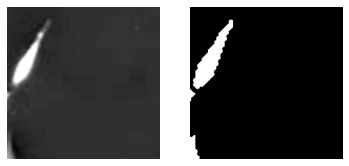

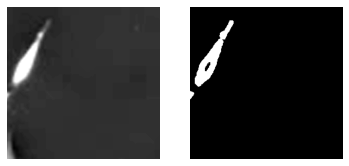

Accuracy                      : 0.9598275577320772
Jaccard score                 : 0.3678253218496543
Precision                     : 0.7230812402430586
Recall                        : 0.3861215434674449
Number of cells in predictions: 2553
Number of cells in masks      : 1951


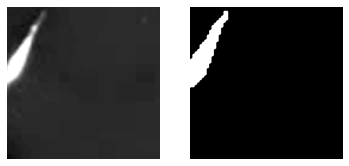

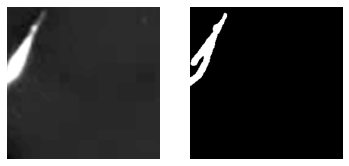

Accuracy                      : 0.9558509078680301
Jaccard score                 : 0.3064840467888774
Precision                     : 0.6837619734689088
Recall                        : 0.32139678159912854
Number of cells in predictions: 2215
Number of cells in masks      : 1751


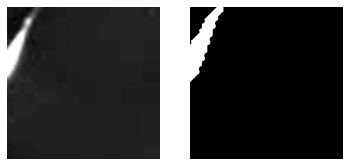

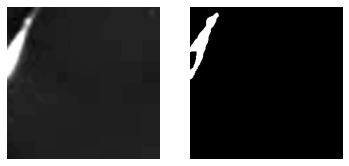

In [ ]:
zooms = np.r_[np.linspace(0.4, 2, 17, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    for image, mask in zip(test_images, test_masks):
        zoomed_test_images.append(zoom_image(image, zoom))
        zoomed_test_masks.append(zoom_image(mask, zoom, val_padding=0))

    result = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    results[zoom] = result
    
    evaluation_summary(result, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, "Zooming Factor")